Linear Regression

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

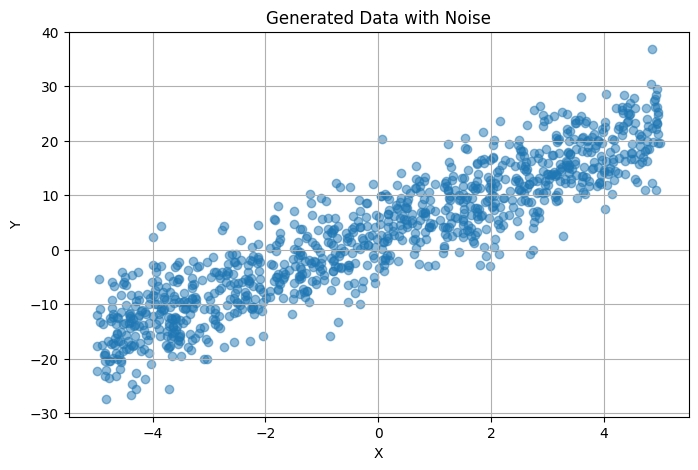

In [ ]:
# Generating Random Data
n = 1000
X = 10 * np.random.random(n) - 5  # X in range (-5, 5)
Y = 4 * X + 3 + np.random.normal(loc=0, scale=5, size=n)  # Y = 4X + 3 + noise

plt.figure(figsize=(8, 5))
plt.scatter(X, Y, alpha=0.5)
plt.title("Generated Data with Noise")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

1. Varying n to see how it affects the accuracy

In [ ]:
from sklearn.linear_model import LinearRegression

for n in [10, 100, 1000, 10000]:
    smpl_x = 10 * np.random.random(n) - 5
    smpl_y = 4 * smpl_x + 3 + np.random.normal(0, 5, n)
    
    model = LinearRegression()
    model.fit(smpl_x.reshape(-1, 1), smpl_y)
    
    print(f"n = {n} => Coeff = {model.coef_[0]:.4f}, Intercept = {model.intercept_:.4f}")


n = 10 => Coeff = 3.4240, Intercept = 3.4180
n = 100 => Coeff = 3.9506, Intercept = 3.3856
n = 1000 => Coeff = 3.9748, Intercept = 3.2130
n = 10000 => Coeff = 4.0237, Intercept = 3.0270


2. Implementing using GD

Trained using GD: a = 4.0086, b = 3.0867


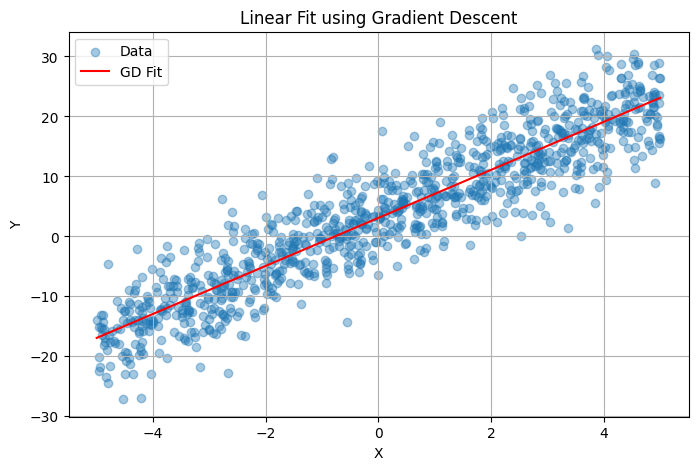

In [15]:
# Generate data
n = 1000
X = 10 * np.random.random(n) - 5
Y = 4 * X + 3 + np.random.normal(loc=0, scale=5, size=n)

# Model function
def Y_based_on_X(x, a, b):
    return a * x + b

# Initialize parameters
a, b = 0.0, 0.0
l = 0.01  # learning rate
epochs = 1000

# Gradient Descent function
for _ in range(epochs):
    Y_pred = Y_based_on_X(X, a, b)
    error = Y_pred - Y
    grad_a = (2/n) * np.dot(error, X)
    grad_b = (2/n) * np.sum(error)
    a -= l * grad_a
    b -= l * grad_b

print(f"Trained using GD: a = {a:.4f}, b = {b:.4f}")

# Plotting
plt.figure(figsize=(8, 5))
plt.scatter(X, Y, alpha=0.4, label='Data')
plt.plot(np.sort(X), Y_based_on_X(np.sort(X), a, b), c="red", label='GD Fit')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Fit using Gradient Descent")
plt.legend()
plt.grid(True)
plt.show()


3. Implementing using SGD with m =100 and n = 1000

In [16]:
# Generate Data
n = 1000
X_raw = 10 * np.random.random(n) - 5
Y_raw = 4 * X_raw + 3 + np.random.normal(0, 5, n)

# Construct design matrix X with intercept
X_0 = [(1, x) for x in X_raw]
X = np.matrix(X_0)
Y = np.matrix(Y_raw).T

# Initialize parameters randomly
beta = np.matrix(np.random.randn(2, 1))

# Hyperparameters
learning_rate = 0.01
epochs = 50
m = 100  # mini-batch size

# SGD loop
for epoch in range(epochs):
    indices = np.random.permutation(n)
    X_shuffled = X[indices]
    Y_shuffled = Y[indices]
    
    for i in range(0, n, m):
        X_batch = X_shuffled[i:i+m]
        Y_batch = Y_shuffled[i:i+m]
        
        error = X_batch @ beta - Y_batch
        gradient = 2/m * X_batch.T @ error
        beta -= learning_rate * gradient

# Display learned parameters
print(f"Matrix = [[{beta[0,0]:.4f}], [{beta[1,0]:.4f}]]")


Matrix = [[2.9332], [3.9918]]
